In [2]:
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive # Memanggil library google colab untuk mounting dengan drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/UAS kecerdasan buatan naive bayes/TelU_reviews.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df

,page,name,link,thumbnail,rating,date,snippet,images,local_guide
0,1,Daryl Cokelat,https://www.google.com/maps/contrib/1138191723...,https://lh3.googleusercontent.com/a-/ALV-UjXVE...,4.0,5 bulan lalu,"Kampus swasta di area yg padat, luas sekali t...",['https://lh5.googleusercontent.com/p/AF1QipMg...,True
1,1,Aries Indanarto,https://www.google.com/maps/contrib/1140064560...,https://lh3.googleusercontent.com/a/ACg8ocL-bK...,1.0,4 minggu lalu,Siang hari ini hadir wisuda anak. Tempat wisud...,['https://lh5.googleusercontent.com/p/AF1QipPt...,True
2,1,mfft_27,https://www.google.com/maps/contrib/1171607731...,https://lh3.googleusercontent.com/a-/ALV-UjVIK...,5.0,3 minggu lalu,jangan lupa follow Ig : mfft_27\ntrmksh 🙏🤩,['https://lh5.googleusercontent.com/p/AF1QipNP...,True
3,1,Fadhil Muhammad,https://www.google.com/maps/contrib/1038668775...,https://lh3.googleusercontent.com/a-/ALV-UjWsF...,5.0,6 bulan lalu,"Kampus swasta ternama, lokasi di bojongsoang k...",['https://lh5.googleusercontent.com/p/AF1QipMp...,True
4,1,Rachmat Hidayar,https://www.google.com/maps/contrib/1001440503...,https://lh3.googleusercontent.com/a-/ALV-UjVWC...,1.0,3 minggu lalu,Yang terhormat bapak kepala satpam dan manajem...,NaN,True
...,...,...,...,...,...,...,...,...,...
993,100,Haeria Haeria,https://www.google.com/maps/contrib/1128644444...,https://lh3.googleusercontent.com/a/ACg8ocKzcl...,4.0,7 tahun lalu,Relax n enjoy ...,['https://lh5.googleusercontent.com/p/AF1QipMH...,True
994,100,Ade Suganda,https://www.google.com/maps/contrib/1088265878...,https://lh3.googleusercontent.com/a-/ALV-UjVWi...,5.0,3 tahun lalu,NaN,['https://lh5.googleusercontent.com/p/AF1QipP5...,True
995,100,Naufal Ardian,https://www.google.com/maps/contrib/1122072985...,https://lh3.googleusercontent.com/a-/ALV-UjVyG...,3.0,7 tahun lalu,toward world class university,NaN,True
996,100,Yunia Rizki Ramdhani,https://www.google.com/maps/contrib/1089158247...,https://lh3.googleusercontent.com/a-/ALV-UjWxF...,5.0,7 tahun lalu,good facility,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   page         998 non-null    int64  
 1   name         998 non-null    object 
 2   link         998 non-null    object 
 3   thumbnail    998 non-null    object 
 4   rating       998 non-null    float64
 5   date         998 non-null    object 
 6   snippet      970 non-null    object 
 7   images       222 non-null    object 
 8   local_guide  808 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 70.3+ KB


In [6]:
df.describe()

,page,rating
count,998.000000,998.000000
mean,50.599198,4.411824
std,28.824160,1.183191
min,1.000000,1.000000
25%,26.000000,4.000000
50%,51.000000,5.000000
75%,75.750000,5.000000
max,100.000000,5.000000


In [9]:
df.isnull().sum()

,0
page,0
name,0
link,0
thumbnail,0
rating,0
date,0
snippet,28
images,776
local_guide,190


In [10]:
df.shape #i jumlah row dan columns pada dataset

(998, 9)

In [19]:
df.duplicated().sum()

np.int64(0)

In [52]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
993,False
994,False
995,False
996,False


##EDA


Rating distribution:
rating
5.0    724
4.0    142
1.0     83
3.0     34
2.0     15
Name: count, dtype: int64


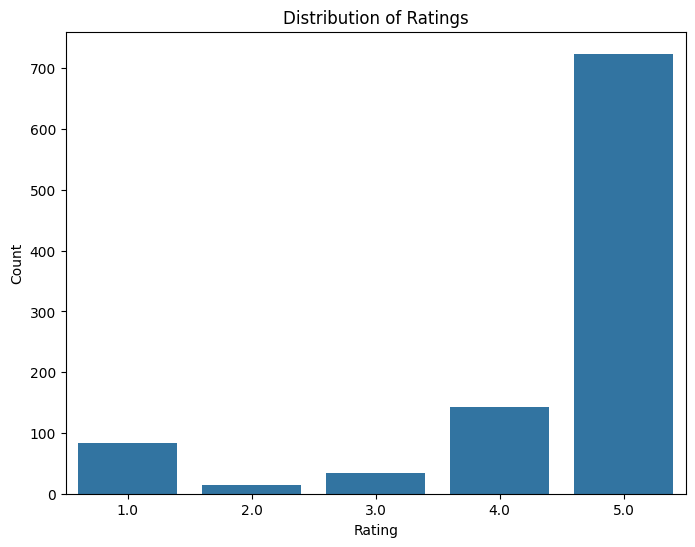

In [14]:
# Count the occurrences of each rating
rating_counts = df['rating'].value_counts()

# Display the counts
print("Rating distribution:")
print(rating_counts)

# Visualize the distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Correlation Matrix:
            page    rating
page    1.000000  0.244065
rating  0.244065  1.000000


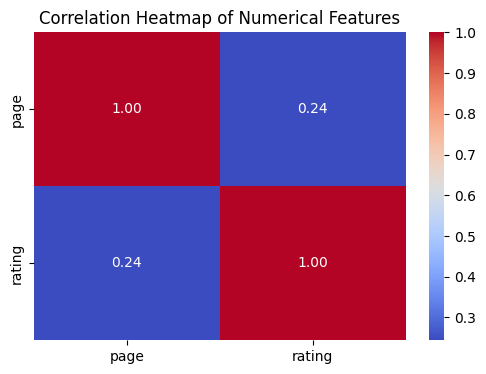

In [18]:
# Select only the numerical columns for correlation analysis
numerical_df = df[['page', 'rating']]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#Preparation

In [20]:
# Fill missing values in 'snippet' with empty string
df['snippet'] = df['snippet'].fillna('')

# Fill missing values in 'images' and 'local_guide' with placeholder values
df['images'] = df['images'].fillna('No Image')
df['local_guide'] = df['local_guide'].fillna('Unknown')

# Verify that missing values have been handled
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
page           0
name           0
link           0
thumbnail      0
rating         0
date           0
snippet        0
images         0
local_guide    0
dtype: int64


In [25]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [30]:
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Pastikan Anda sudah mendownload stopwords NLTK jika belum
try:
    stopwords.words('indonesian')
except LookupError:
    nltk.download('stopwords')

stop_words = stopwords.words('indonesian')
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi lowercase
def lowercase(text):
    return text.lower()

# Fungsi preprocessing (menghapus URL, username, karakter non-alfabet, kata pendek)
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    text = ' '.join([word for word in text.split() if len(word) > 3])
    return text

# Fungsi stemming
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Fungsi stopword removal
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Terapkan preprocessing pada kolom teks
df['Cleaned_Text'] = df['snippet'].apply(lowercase)
df['Cleaned_Text'] = df['Cleaned_Text'].apply(preprocess_text)
df['Cleaned_Text'] = df['Cleaned_Text'].apply(stem_sentences)
df['Cleaned_Text'] = df['Cleaned_Text'].apply(remove_stopwords)

print(df.head())

   page             name                                               link  \
0     1    Daryl Cokelat  https://www.google.com/maps/contrib/1138191723...   
1     1  Aries Indanarto  https://www.google.com/maps/contrib/1140064560...   
2     1          mfft_27  https://www.google.com/maps/contrib/1171607731...   
3     1  Fadhil Muhammad  https://www.google.com/maps/contrib/1038668775...   
4     1  Rachmat Hidayar  https://www.google.com/maps/contrib/1001440503...   

                                           thumbnail  rating           date  \
0  https://lh3.googleusercontent.com/a-/ALV-UjXVE...     4.0   5 bulan lalu   
1  https://lh3.googleusercontent.com/a/ACg8ocL-bK...     1.0  4 minggu lalu   
2  https://lh3.googleusercontent.com/a-/ALV-UjVIK...     5.0  3 minggu lalu   
3  https://lh3.googleusercontent.com/a-/ALV-UjWsF...     5.0   6 bulan lalu   
4  https://lh3.googleusercontent.com/a-/ALV-UjVWC...     1.0  3 minggu lalu   

                                             snipp

##MODELING

In [33]:
from sklearn.model_selection import train_test_split


X = df['Cleaned_Text']
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Anda bisa ubah test_size dan random_state

print(f'Ukuran data pelatihan: {X_train.shape}')
print(f'Ukuran data pengujian: {X_test.shape}')

Ukuran data pelatihan: (698,)
Ukuran data pengujian: (300,)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f'Ukuran vektor TF-IDF data pelatihan: {X_train_tfidf.shape}')
print(f'Ukuran vektor TF-IDF data pengujian: {X_test_tfidf.shape}')

Ukuran vektor TF-IDF data pelatihan: (698, 1635)
Ukuran vektor TF-IDF data pengujian: (300, 1635)


In [35]:
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes
model_nb = MultinomialNB()

# Latih model
model_nb.fit(X_train_tfidf, y_train)

print("Model Naive Bayes selesai dilatih.")

Model Naive Bayes selesai dilatih.


In [36]:
# Melakukan prediksi pada data pengujian
y_pred_nb = model_nb.predict(X_test_tfidf)

print("Prediksi selesai.")

Prediksi selesai.


##EVALUASI

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Menghitung akurasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Akurasi model Naive Bayes: {accuracy_nb:.4f}')

# Menampilkan classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_nb))

# Menampilkan confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_nb))

Akurasi model Naive Bayes: 0.7400

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.04      0.08        23
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00        14
         4.0       0.00      0.00      0.00        37
         5.0       0.74      1.00      0.85       221

    accuracy                           0.74       300
   macro avg       0.35      0.21      0.19       300
weighted avg       0.62      0.74      0.63       300


Confusion Matrix:
[[  1   0   0   0  22]
 [  0   0   0   0   5]
 [  0   0   0   0  14]
 [  0   0   0   0  37]
 [  0   0   0   0 221]]


In [38]:
df

,page,name,link,thumbnail,rating,date,snippet,images,local_guide,Cleaned_Text
0,1,Daryl Cokelat,https://www.google.com/maps/contrib/1138191723...,https://lh3.googleusercontent.com/a-/ALV-UjXVE...,4.0,5 bulan lalu,"Kampus swasta di area yg padat, luas sekali t...",['https://lh5.googleusercontent.com/p/AF1QipMg...,True,kampus swasta area padat luas sayang tata park...
1,1,Aries Indanarto,https://www.google.com/maps/contrib/1140064560...,https://lh3.googleusercontent.com/a/ACg8ocL-bK...,1.0,4 minggu lalu,Siang hari ini hadir wisuda anak. Tempat wisud...,['https://lh5.googleusercontent.com/p/AF1QipPt...,True,siang hadir wisuda anak wisuda worted duduk se...
2,1,mfft_27,https://www.google.com/maps/contrib/1171607731...,https://lh3.googleusercontent.com/a-/ALV-UjVIK...,5.0,3 minggu lalu,jangan lupa follow Ig : mfft_27\ntrmksh 🙏🤩,['https://lh5.googleusercontent.com/p/AF1QipNP...,True,lupa follow mfft trmksh
3,1,Fadhil Muhammad,https://www.google.com/maps/contrib/1038668775...,https://lh3.googleusercontent.com/a-/ALV-UjWsF...,5.0,6 bulan lalu,"Kampus swasta ternama, lokasi di bojongsoang k...",['https://lh5.googleusercontent.com/p/AF1QipMp...,True,kampus swasta nama lokasi bojongsoang kabupate...
4,1,Rachmat Hidayar,https://www.google.com/maps/contrib/1001440503...,https://lh3.googleusercontent.com/a-/ALV-UjVWC...,1.0,3 minggu lalu,Yang terhormat bapak kepala satpam dan manajem...,No Image,True,hormat kepala satpam manajemen telkom mohon at...
...,...,...,...,...,...,...,...,...,...,...
993,100,Haeria Haeria,https://www.google.com/maps/contrib/1128644444...,https://lh3.googleusercontent.com/a/ACg8ocKzcl...,4.0,7 tahun lalu,Relax n enjoy ...,['https://lh5.googleusercontent.com/p/AF1QipMH...,True,relax enjoy
994,100,Ade Suganda,https://www.google.com/maps/contrib/1088265878...,https://lh3.googleusercontent.com/a-/ALV-UjVWi...,5.0,3 tahun lalu,,['https://lh5.googleusercontent.com/p/AF1QipP5...,True,
995,100,Naufal Ardian,https://www.google.com/maps/contrib/1122072985...,https://lh3.googleusercontent.com/a-/ALV-UjVyG...,3.0,7 tahun lalu,toward world class university,No Image,True,toward world class university
996,100,Yunia Rizki Ramdhani,https://www.google.com/maps/contrib/1089158247...,https://lh3.googleusercontent.com/a-/ALV-UjWxF...,5.0,7 tahun lalu,good facility,No Image,Unknown,good facility


In [39]:
# List of negative phrases provided by the user
negative_phrases = [
    "mengajari mahasiswanya menjadi maling",
    "tidak di sediakan kursi di tenda2",
    "duduk di trotoar",
    "sangat di sayangkan",
    "tidak pantas",
    "kampus tai emang",
    "satpamnya kurang kooperatif",
    "diskriminasi terhadap ojol",
    "helpdesk ga mau di titipin",
    "fungsi satpam sama helpdesk apa",
    "cuma duduk sambil main hp doang",
    "driver ga boleh bawa motor sampai titik antar",
    "tidak ada droppoin driver",
    "harus jalan kaki keasrama",
    "toilet di asrama nya masih jongkok",
    "ketinggalan zaman",
    "mengecewakan",
    "bukan solusi yg baik",
    "sakit tbc tulang",
    "bersampak juga pada pembuat peraturan dan satpam",
    "web telkom bapuk banget",
    "lemot",
    "suka tiba tiba ngilang",
    "harus isi ulang",
    "susah dapat kerjaan",
    "birokrasi yang terlalu ribet",
    "satpam yang tidak ramah",
    "dosen bikin pusing buat brief agak kurang nyambung",
    "bangunannya kurang terawat",
    "tidak suka sama tukang parkirnya",
    "jalannya jelek area kampus",
    "kumuh terlalu banyak pedagang",
    "tidak peduli dengan keadaan mahasiswa nya",
    "tidak menghargai orang lain",
    "angkuh",
    "ga punya hati",
    "satpam pintu masuk mobil pun ga punya attitude sama sekali",
    "tidak sopan",
    "gk pada sopan",
    "gk pada punya otak",
    "sekejam itu kah telyu",
    "kurang ruang terbuka hijaunya",
    "tidak transparan",
    "uang pendaftaran harus ditransfer dulu",
    "isi data susah",
    "gak diterima di jurusan yg dipilih",
    "diarahkan ke jurusan lainnya",
    "kasian",
    "ngabisin waktu",
    "ribet kalau mau nganterin barang harus jalan kaki"
]

# Function to check if any negative phrase exists in the text
def contains_negative_phrase(text, phrases):
    # Ensure text is a string and handle potential NaN values after cleaning
    if not isinstance(text, str):
        return False
    text_lower = text.lower()
    for phrase in phrases:
        if phrase.lower() in text_lower:
            return True
    return False

# Apply the function to create the new column
df['Is_Negative_Keyword'] = df['Cleaned_Text'].apply(lambda x: contains_negative_phrase(x, negative_phrases))

# Display the count of negative reviews detected by keywords
print("Number of reviews detected as negative based on keywords:")
print(df['Is_Negative_Keyword'].sum())

# Display some of the reviews flagged as negative
print("\nExamples of reviews flagged as negative:")
display(df[df['Is_Negative_Keyword'] == True][['snippet', 'Cleaned_Text', 'Is_Negative_Keyword']].head())

Number of reviews detected as negative based on keywords:
2

Examples of reviews flagged as negative:


,snippet,Cleaned_Text,Is_Negative_Keyword
96,"Web Telkom bapuk banget woi, mau ngisi data di...",telkom bapuk banget ngisi data susah banget su...,True
128,Mahasiswa di sini kebanyakan tidak tau cara me...,mahasiswa harga orang bicara karna alam jalan ...,True


In [40]:
df

,page,name,link,thumbnail,rating,date,snippet,images,local_guide,Cleaned_Text,Is_Negative_Keyword
0,1,Daryl Cokelat,https://www.google.com/maps/contrib/1138191723...,https://lh3.googleusercontent.com/a-/ALV-UjXVE...,4.0,5 bulan lalu,"Kampus swasta di area yg padat, luas sekali t...",['https://lh5.googleusercontent.com/p/AF1QipMg...,True,kampus swasta area padat luas sayang tata park...,False
1,1,Aries Indanarto,https://www.google.com/maps/contrib/1140064560...,https://lh3.googleusercontent.com/a/ACg8ocL-bK...,1.0,4 minggu lalu,Siang hari ini hadir wisuda anak. Tempat wisud...,['https://lh5.googleusercontent.com/p/AF1QipPt...,True,siang hadir wisuda anak wisuda worted duduk se...,False
2,1,mfft_27,https://www.google.com/maps/contrib/1171607731...,https://lh3.googleusercontent.com/a-/ALV-UjVIK...,5.0,3 minggu lalu,jangan lupa follow Ig : mfft_27\ntrmksh 🙏🤩,['https://lh5.googleusercontent.com/p/AF1QipNP...,True,lupa follow mfft trmksh,False
3,1,Fadhil Muhammad,https://www.google.com/maps/contrib/1038668775...,https://lh3.googleusercontent.com/a-/ALV-UjWsF...,5.0,6 bulan lalu,"Kampus swasta ternama, lokasi di bojongsoang k...",['https://lh5.googleusercontent.com/p/AF1QipMp...,True,kampus swasta nama lokasi bojongsoang kabupate...,False
4,1,Rachmat Hidayar,https://www.google.com/maps/contrib/1001440503...,https://lh3.googleusercontent.com/a-/ALV-UjVWC...,1.0,3 minggu lalu,Yang terhormat bapak kepala satpam dan manajem...,No Image,True,hormat kepala satpam manajemen telkom mohon at...,False
...,...,...,...,...,...,...,...,...,...,...,...
993,100,Haeria Haeria,https://www.google.com/maps/contrib/1128644444...,https://lh3.googleusercontent.com/a/ACg8ocKzcl...,4.0,7 tahun lalu,Relax n enjoy ...,['https://lh5.googleusercontent.com/p/AF1QipMH...,True,relax enjoy,False
994,100,Ade Suganda,https://www.google.com/maps/contrib/1088265878...,https://lh3.googleusercontent.com/a-/ALV-UjVWi...,5.0,3 tahun lalu,,['https://lh5.googleusercontent.com/p/AF1QipP5...,True,,False
995,100,Naufal Ardian,https://www.google.com/maps/contrib/1122072985...,https://lh3.googleusercontent.com/a-/ALV-UjVyG...,3.0,7 tahun lalu,toward world class university,No Image,True,toward world class university,False
996,100,Yunia Rizki Ramdhani,https://www.google.com/maps/contrib/1089158247...,https://lh3.googleusercontent.com/a-/ALV-UjWxF...,5.0,7 tahun lalu,good facility,No Image,Unknown,good facility,False


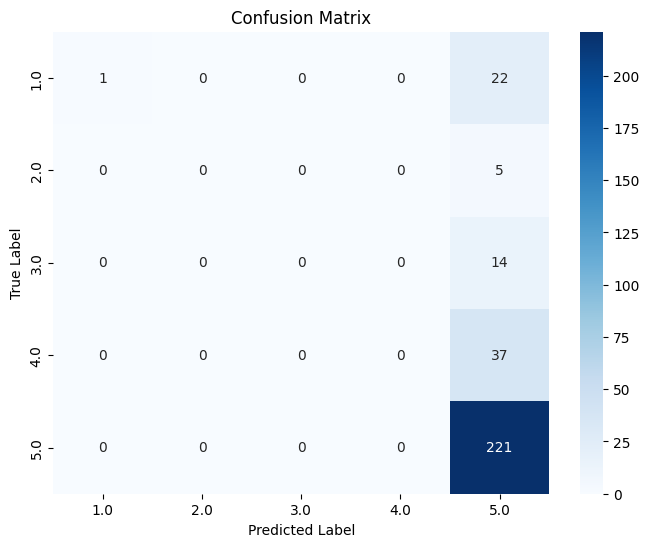

In [41]:
# Calculate the confusion matrix again (if not already stored)
cm = confusion_matrix(y_test, y_pred_nb)

# Get the unique classes from the test set
classes = np.unique(y_test)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
df

,page,name,link,thumbnail,rating,date,snippet,images,local_guide,Cleaned_Text,Is_Negative_Keyword
0,1,Daryl Cokelat,https://www.google.com/maps/contrib/1138191723...,https://lh3.googleusercontent.com/a-/ALV-UjXVE...,4.0,5 bulan lalu,"Kampus swasta di area yg padat, luas sekali t...",['https://lh5.googleusercontent.com/p/AF1QipMg...,True,kampus swasta area padat luas sayang tata park...,False
1,1,Aries Indanarto,https://www.google.com/maps/contrib/1140064560...,https://lh3.googleusercontent.com/a/ACg8ocL-bK...,1.0,4 minggu lalu,Siang hari ini hadir wisuda anak. Tempat wisud...,['https://lh5.googleusercontent.com/p/AF1QipPt...,True,siang hadir wisuda anak wisuda worted duduk se...,False
2,1,mfft_27,https://www.google.com/maps/contrib/1171607731...,https://lh3.googleusercontent.com/a-/ALV-UjVIK...,5.0,3 minggu lalu,jangan lupa follow Ig : mfft_27\ntrmksh 🙏🤩,['https://lh5.googleusercontent.com/p/AF1QipNP...,True,lupa follow mfft trmksh,False
3,1,Fadhil Muhammad,https://www.google.com/maps/contrib/1038668775...,https://lh3.googleusercontent.com/a-/ALV-UjWsF...,5.0,6 bulan lalu,"Kampus swasta ternama, lokasi di bojongsoang k...",['https://lh5.googleusercontent.com/p/AF1QipMp...,True,kampus swasta nama lokasi bojongsoang kabupate...,False
4,1,Rachmat Hidayar,https://www.google.com/maps/contrib/1001440503...,https://lh3.googleusercontent.com/a-/ALV-UjVWC...,1.0,3 minggu lalu,Yang terhormat bapak kepala satpam dan manajem...,No Image,True,hormat kepala satpam manajemen telkom mohon at...,False
...,...,...,...,...,...,...,...,...,...,...,...
993,100,Haeria Haeria,https://www.google.com/maps/contrib/1128644444...,https://lh3.googleusercontent.com/a/ACg8ocKzcl...,4.0,7 tahun lalu,Relax n enjoy ...,['https://lh5.googleusercontent.com/p/AF1QipMH...,True,relax enjoy,False
994,100,Ade Suganda,https://www.google.com/maps/contrib/1088265878...,https://lh3.googleusercontent.com/a-/ALV-UjVWi...,5.0,3 tahun lalu,,['https://lh5.googleusercontent.com/p/AF1QipP5...,True,,False
995,100,Naufal Ardian,https://www.google.com/maps/contrib/1122072985...,https://lh3.googleusercontent.com/a-/ALV-UjVyG...,3.0,7 tahun lalu,toward world class university,No Image,True,toward world class university,False
996,100,Yunia Rizki Ramdhani,https://www.google.com/maps/contrib/1089158247...,https://lh3.googleusercontent.com/a-/ALV-UjWxF...,5.0,7 tahun lalu,good facility,No Image,Unknown,good facility,False


In [51]:
df.head()

,page,name,link,thumbnail,rating,date,snippet,images,local_guide,Cleaned_Text,Is_Negative_Keyword,Sentiment_Label
0,1,Daryl Cokelat,https://www.google.com/maps/contrib/1138191723...,https://lh3.googleusercontent.com/a-/ALV-UjXVE...,4.0,5 bulan lalu,"Kampus swasta di area yg padat, luas sekali t...",['https://lh5.googleusercontent.com/p/AF1QipMg...,True,kampus swasta area padat luas sayang tata park...,False,Positif
1,1,Aries Indanarto,https://www.google.com/maps/contrib/1140064560...,https://lh3.googleusercontent.com/a/ACg8ocL-bK...,1.0,4 minggu lalu,Siang hari ini hadir wisuda anak. Tempat wisud...,['https://lh5.googleusercontent.com/p/AF1QipPt...,True,siang hadir wisuda anak wisuda worted duduk se...,False,Negatif
2,1,mfft_27,https://www.google.com/maps/contrib/1171607731...,https://lh3.googleusercontent.com/a-/ALV-UjVIK...,5.0,3 minggu lalu,jangan lupa follow Ig : mfft_27\ntrmksh 🙏🤩,['https://lh5.googleusercontent.com/p/AF1QipNP...,True,lupa follow mfft trmksh,False,Positif
3,1,Fadhil Muhammad,https://www.google.com/maps/contrib/1038668775...,https://lh3.googleusercontent.com/a-/ALV-UjWsF...,5.0,6 bulan lalu,"Kampus swasta ternama, lokasi di bojongsoang k...",['https://lh5.googleusercontent.com/p/AF1QipMp...,True,kampus swasta nama lokasi bojongsoang kabupate...,False,Positif
4,1,Rachmat Hidayar,https://www.google.com/maps/contrib/1001440503...,https://lh3.googleusercontent.com/a-/ALV-UjVWC...,1.0,3 minggu lalu,Yang terhormat bapak kepala satpam dan manajem...,No Image,True,hormat kepala satpam manajemen telkom mohon at...,False,Negatif


In [49]:
# Function to map rating to sentiment label
def get_sentiment_label(rating):
    if rating in [1.0, 2.0]:
        return 'Negatif'
    elif rating == 3.0:
        return 'Netral'
    elif rating in [4.0, 5.0]:
        return 'Positif'
    else:
        return 'Tidak Diketahui' # Handle any unexpected rating values

# Apply the function to create the new 'Sentiment_Label' column
df['Sentiment_Label'] = df['rating'].apply(get_sentiment_label)

# Display the distribution of the new sentiment labels
print("Distribution of Sentiment Labels:")
print(df['Sentiment_Label'].value_counts())

# Display the first few rows with the new column
display(df[['snippet', 'rating', 'Sentiment_Label']].head())

Distribution of Sentiment Labels:
Sentiment_Label
Positif    866
Negatif     98
Netral      34
Name: count, dtype: int64


,snippet,rating,Sentiment_Label
0,"Kampus swasta di area yg padat, luas sekali t...",4.0,Positif
1,Siang hari ini hadir wisuda anak. Tempat wisud...,1.0,Negatif
2,jangan lupa follow Ig : mfft_27\ntrmksh 🙏🤩,5.0,Positif
3,"Kampus swasta ternama, lokasi di bojongsoang k...",5.0,Positif
4,Yang terhormat bapak kepala satpam dan manajem...,1.0,Negatif


<Figure size 800x600 with 0 Axes>

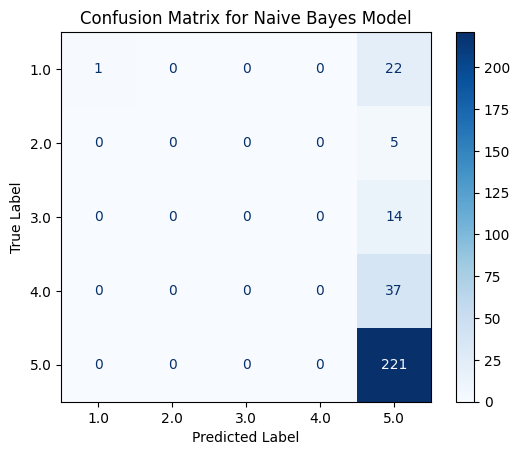

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confusion matrix using the actual test labels and the predicted labels
cm = confusion_matrix(y_test, y_pred_nb)

# Get the unique class labels from the test set (these will be used as display labels)
class_labels = np.unique(y_test)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6)) # Adjust figure size if needed
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False) # Hide grid lines for cleaner look
plt.show()

In [54]:
df

,page,name,link,thumbnail,rating,date,snippet,images,local_guide,Cleaned_Text,Is_Negative_Keyword,Sentiment_Label
0,1,Daryl Cokelat,https://www.google.com/maps/contrib/1138191723...,https://lh3.googleusercontent.com/a-/ALV-UjXVE...,4.0,5 bulan lalu,"Kampus swasta di area yg padat, luas sekali t...",['https://lh5.googleusercontent.com/p/AF1QipMg...,True,kampus swasta area padat luas sayang tata park...,False,Positif
1,1,Aries Indanarto,https://www.google.com/maps/contrib/1140064560...,https://lh3.googleusercontent.com/a/ACg8ocL-bK...,1.0,4 minggu lalu,Siang hari ini hadir wisuda anak. Tempat wisud...,['https://lh5.googleusercontent.com/p/AF1QipPt...,True,siang hadir wisuda anak wisuda worted duduk se...,False,Negatif
2,1,mfft_27,https://www.google.com/maps/contrib/1171607731...,https://lh3.googleusercontent.com/a-/ALV-UjVIK...,5.0,3 minggu lalu,jangan lupa follow Ig : mfft_27\ntrmksh 🙏🤩,['https://lh5.googleusercontent.com/p/AF1QipNP...,True,lupa follow mfft trmksh,False,Positif
3,1,Fadhil Muhammad,https://www.google.com/maps/contrib/1038668775...,https://lh3.googleusercontent.com/a-/ALV-UjWsF...,5.0,6 bulan lalu,"Kampus swasta ternama, lokasi di bojongsoang k...",['https://lh5.googleusercontent.com/p/AF1QipMp...,True,kampus swasta nama lokasi bojongsoang kabupate...,False,Positif
4,1,Rachmat Hidayar,https://www.google.com/maps/contrib/1001440503...,https://lh3.googleusercontent.com/a-/ALV-UjVWC...,1.0,3 minggu lalu,Yang terhormat bapak kepala satpam dan manajem...,No Image,True,hormat kepala satpam manajemen telkom mohon at...,False,Negatif
...,...,...,...,...,...,...,...,...,...,...,...,...
993,100,Haeria Haeria,https://www.google.com/maps/contrib/1128644444...,https://lh3.googleusercontent.com/a/ACg8ocKzcl...,4.0,7 tahun lalu,Relax n enjoy ...,['https://lh5.googleusercontent.com/p/AF1QipMH...,True,relax enjoy,False,Positif
994,100,Ade Suganda,https://www.google.com/maps/contrib/1088265878...,https://lh3.googleusercontent.com/a-/ALV-UjVWi...,5.0,3 tahun lalu,,['https://lh5.googleusercontent.com/p/AF1QipP5...,True,,False,Positif
995,100,Naufal Ardian,https://www.google.com/maps/contrib/1122072985...,https://lh3.googleusercontent.com/a-/ALV-UjVyG...,3.0,7 tahun lalu,toward world class university,No Image,True,toward world class university,False,Netral
996,100,Yunia Rizki Ramdhani,https://www.google.com/maps/contrib/1089158247...,https://lh3.googleusercontent.com/a-/ALV-UjWxF...,5.0,7 tahun lalu,good facility,No Image,Unknown,good facility,False,Positif
